<a href="https://colab.research.google.com/github/sumaia42/Ostad_Course/blob/main/Module12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview -- KNN

###  Breast Cancer Wisconsin Diagnostic


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
df = pd.read_csv("/content/Breast_Cancer_Diagnostic.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


We will only consider ten real-valued features in this project for diagnostic!<br>
**Please separate the required features along with diagnosis column (list of the columns is bewlow) and display the head of the data.**<br>
`['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']`

In [36]:
# code her please so than you don't lose the existing output

In [37]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


**Get the overview of your data using info, is there any missing value?**

In [38]:
# code her please so than you don't lose the existing output

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   area_mean               569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   concavity_mean          569 non-null    float64
 7   concave points_mean     569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
 10  diagnosis               569 non-null    object 
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [40]:
df.isnull().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
diagnosis                 0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

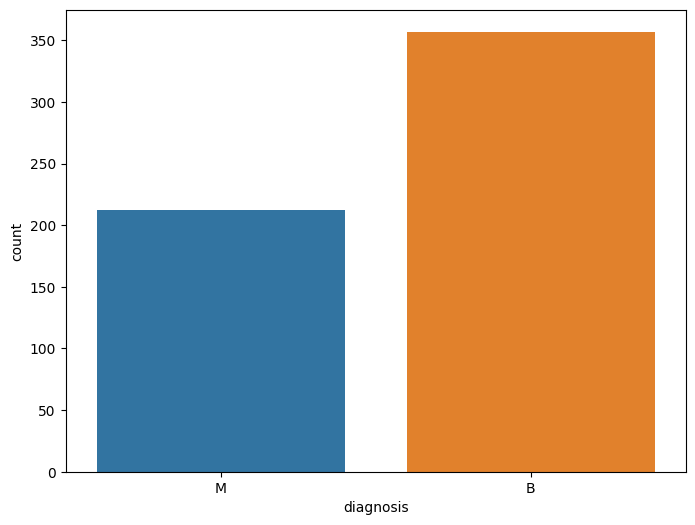

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x = df['diagnosis'])

In [42]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

**Which type of breast cancer is common?**

In [43]:
# code her please so than you don't lose the existing output

In [44]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

** Standardize the variable/features to get your data ready for knn**<br>
** import `StandardScaler`**

In [45]:
# code here please so than you don't lose the existing output

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
df.diagnosis

<ipython-input-46-8c88e832aa18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler


**Create object of `scaler`**

In [48]:
# code her please so than you don't lose the existing output

In [49]:
scaler = StandardScaler()


**Split the data into `features` and `target` to fit the `scaler` to the features only!**

In [50]:
# code her please so than you don't lose the existing output

** Fit `scaler` to the features now!**

In [51]:
# code her please so than you don't lose the existing output

In [52]:
scale = scaler.fit_transform(df)

** Please get the scaled features into `scaled_features` **

In [53]:
# code her please so than you don't lose the existing output

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

** Do the train_test split** <br>Please use `test_size=0.33, random_state=42`

In [56]:
# code her please so than you don't lose the existing output

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

**import the `KNeighborsClassifier`**

In [58]:
# code her please so than you don't lose the existing output

In [59]:
from sklearn.neighbors import KNeighborsClassifier


** Create a KNN model instance with n_neighbors=1**

In [60]:
# code her please so than you don't lose the existing output

In [61]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)



**Fit the model to the training data**

In [62]:
# code her please so than you don't lose the existing output

In [63]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Do the predictions for the test data**

In [64]:
# code her please so than you don't lose the existing output

In [65]:
predictions = knn_classifier.predict(X_test)

** Print confusion matrix and classification report**

In [66]:
cm = confusion_matrix(y_test,predictions)
print(cm)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

[[109  12]
 [ 15  52]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       121
           1       0.81      0.78      0.79        67

    accuracy                           0.86       188
   macro avg       0.85      0.84      0.84       188
weighted avg       0.86      0.86      0.86       188



## Great Job!
More data you have, the better you can train your model!